In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [3]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [4]:
y.index = y.name

In [5]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [6]:
y.index = pd.to_datetime(y.index)

In [7]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [8]:
from pytrends.request import TrendReq

In [39]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone", "Recession", "Interest Rates", "New Phone", "Buy iPhone", "IOS", "Taylor Swift Tickets", "Steve Jobs"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [40]:
X = df.resample("Q").mean()

In [41]:
# ALIGN DATA
temp = pd.concat([y, X],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

# 3.) Normalize all the X data

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [44]:
X_scaled = scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [45]:
from sklearn.linear_model import Lasso

In [46]:
lasso = Lasso(alpha = .1)

In [47]:
lasso.fit(X_scaled,y)

Lasso(alpha=0.1)

In [48]:
coefficients = lasso.coef_

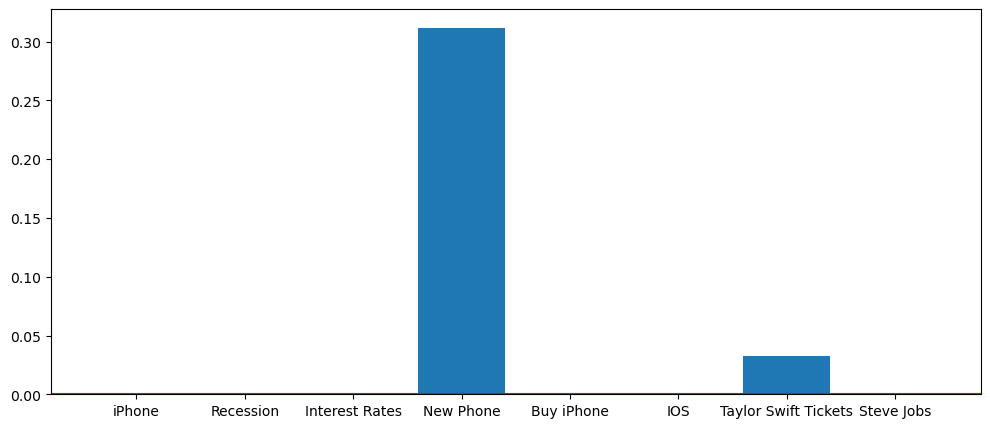

In [49]:
plt.figure(figsize = (12,5))
plt.bar(range(len(coefficients)), coefficients, tick_label = X.columns)
plt.axhline(0, color = "red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

The large positive coefficient for "New Phone" would suggest that the release of a new phone has a significant positive impact on EPS. This could make sense if, for instance, the data pertains to a company in the telecommunications sector or a company for which phone sales are a significant part of the business. New phone releases can drive substantial revenue, improving profitability and EPS.

Smaller coefficients for variables like "iPhone", "Recession", "Interest Rates", "iOS", "Taylor Swift Tickets", and "Steve Jobs" imply a smaller direct influence on EPS. "Taylor Swift Tickets" coefficient's small magnitude indicates that while there may be an association, it is not as strong as the one observed with "New Phone", which makes sense given that the latter is likely a more direct driver of company revenue and profits.